In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [4]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [5]:
import pandas as pd
from PIL import Image as ima
import warnings
from pathlib import Path
import random

In [6]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

# Add function def show_anns (borrowed from one of the Jupyter notebooks).
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    # polygons = []
    # color = []
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
    # for ann in sorted_anns:
    #     m = ann['segmentation']
    #     img = np.ones((m.shape[0], m.shape[1], 3))
    #     color_mask = np.random.random((1, 3)).tolist()[0]
    #     for i in range(3):
    #         img[:,:,i] = color_mask[i]
    #     ax.imshow(np.dstack((img, m*0.35)))

In [90]:
# from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
# sam = sam_model_registry["vit_h"](checkpoint="/home/yelhe/data/sam/sam_vit_h_4b8939.pth")
# mask_generator = SamAutomaticMaskGenerator(sam)


### Data preparation

In [7]:
koord  = pd.read_csv('/home/yelhe/script/mt/output/koord.csv')

In [8]:
# koord.head()
name1 = koord.Nr.astype(str) + '1.jpg'
name2 = koord.Nr.astype(str) + '2.jpg'
name3 = koord.Nr.astype(str) + '3.jpg'
name4 = koord.Nr.astype(str) + '4.jpg'

In [9]:
gsv_image1 = []
gsv_image2 = []
gsv_image3 = []
gsv_image4 = []

nf1 = []
nf2 = []
nf3 = []
nf4 = []
for i in range(0,349):
    path1 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name1[i])
    c1 = path1.is_file()
    path2 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name2[i])
    c2 = path2.is_file()
    path3 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name3[i])
    c3 = path3.is_file()
    path4 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name4[i])
    c4 = path4.is_file()
    if c1 is True:
        im1 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name1[i])
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
        gsv_image1.append(im1)
        nf1.append(name1[i])
    if c2 is True:
        im2 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name2[i])
        im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
        gsv_image2.append(im2)
        nf2.append(name2[i])
    if c3 is True:
        im3 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name3[i])
        im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
        gsv_image3.append(im3)
        nf3.append(name3[i])
    if c4 is True:
        im4 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name4[i])
        im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
        gsv_image4.append(im4)
        nf4.append(name4[i])

In [10]:
print(len(gsv_image1),len(gsv_image2),len(gsv_image3),len(gsv_image4))

295 295 295 295


In [11]:
n1 = [s.replace('.jpg', '') for s in nf1]
n2 = [s.replace('.jpg', '') for s in nf2]
n3 = [s.replace('.jpg', '') for s in nf3]
n4 = [s.replace('.jpg', '') for s in nf4]

### Functions preparation

In [12]:
def convert_mask(masks):
    mb01 = []
    mb02 = []
    mb = []
    n = len(masks)
    for i in range(0, n):
        mb01.append(masks[i]['segmentation'])
    for i in range(0, n):
        mb02.append(mb01[i]*1)
    for i in range(0, n):
        mb.append(mb02[i].astype('uint8'))
    return mb

In [13]:
def output_mask(im):
    im1 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    mask_r = mask_generator.generate(im1)
    mask_c = convert_mask(mask_r)
    return mask_c

In [14]:
# Updated Function
# Function to find and plot filtered contours (find-filter-plot-contour)
# Run for each mask of each image
def ffpcontour_noplot(image, mask, i):
    assert image is not None, "image file could not be read, check with os.path.exists()"
    assert mask is not None, "mask file could not be read, check with os.path.exists()"
    # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    ll = [] # length list
    for i in range(0, len(contours)):
          ll.append(len(contours[i]))
    maxl = max(ll)
    maxindex = ll.index(maxl)
    if (len(contours) == 1) and (maxl >= 6):
        contour_f = contours
    elif (maxl>=80) :
        contour_f = []
        for i in range(0, len(contours)):
        # print(i, "len", len(contours[i]))
            if (len(contours[i]) >= 80):
                contour_f.append(contours[i])
            else:
                contour_f = contour_f
    elif (maxl >= 6):
        contour_f = []
        contour_f.append(contours[maxindex])
    else: 
        contour_f = []
    # print("filtered", "len", len(contour_f), contour_f) 
    # print("raw",len(contours))
    # print("filtered", len(contour_f))
    return contour_f

In [15]:
# Contour geometric attributes result
# For each contour
def cgr(contour):
    assert contour is not None, "image file could not be read, check with os.path.exists()"
    c = contour
    isconvex = cv2.isContourConvex(c) # Checking convexity
    (x,y), (w,h), ar = cv2.minAreaRect(c) # Rotated rectangle with minimum area
    M = cv2.moments(c) # Moments
    area = cv2.contourArea(c) # Area 
    if (M['m00'] != 0):
        cx = int(M['m10']/M['m00']) # Centroid
        cy = int(M['m01']/M['m00'])
    else:
        cx = x
        cy = y
    xs,ys,ws,hs = cv2.boundingRect(c) # Straight bounding rectangle
    aspect_ratio_wh_s = float(ws)/hs # Aspect ratio
    extent_s = float(area)/(ws*hs) # Extent
    hull = cv2.convexHull(c) # Solidity
    hull_area = cv2.contourArea(hull)
    if (hull_area != 0):
        solidity = float(area)/hull_area
    else:
        solidity = 0
    aspect_ratio_wh = float(w)/h  # Aspect ratio
    extent = float(area)/(w*h) # Extent
    (xe,ye),(MA,ma),ae = cv2.fitEllipse(c)
    ed = np.sqrt(4*area/np.pi) # Equivalent Diameter
    ratio_ell = float(ma)/MA
    perimeter = cv2.arcLength(c, True) # Arclength
    p_centroid = np.array([float(cx), float(cy)])
    p_masscenter = np.array([float(x), float(y)])
    is_cen_inside = cv2.pointPolygonTest(c, p_centroid, False) # Checking if centroid is inside
    is_mce_inside = cv2.pointPolygonTest(c, p_masscenter, False) # Checking if mass center is inside    
    return {
        'isconvex': isconvex,
        'area': area,
        'aspect_ratio_wh_s': aspect_ratio_wh_s,
        'extent_s': extent_s,
        'solidity': solidity,
        'aspect_ratio_wh': aspect_ratio_wh,
        'extent': extent,
        'ed': ed,
        'ratio_ell': ratio_ell,
        'perimeter': perimeter,
        'is_cen_inside': is_cen_inside,
        'is_mce_inside': is_mce_inside
    }
          

In [16]:
def csga(contours):
    assert contours is not None, "image file could not be read, check with os.path.exists()"
    if len(contours) == 1:
        ga = cgr(contours[0])
    else:
        gal = []
        for i in range(0, (len(contours)-1)):
            gal.append(cgr(contours[i]))
        isc = []
        al = []
        asps = []
        exts = []
        sol = []
        asp = []
        ext = []
        ed = []
        rate = []
        per = []
        isc = []
        ism = []
        for i in range(0, len(gal)):
            isc.append(gal[0]['isconvex'])
            al.append(gal[0]['area'])
            asps.append(gal[0]['aspect_ratio_wh_s'])
            exts.append(gal[0]['extent_s'])
            sol.append(gal[0]['solidity'])
            asp.append(gal[0]['aspect_ratio_wh'])
            ext.append(gal[0]['extent'])
            ed.append(gal[0]['ed'])
            rate.append(gal[0]['ratio_ell'])
            per.append(gal[0]['perimeter'])
            isc.append(gal[0]['is_cen_inside'])
            ism.append(gal[0]['is_mce_inside'])
        isconvex = np.all(isc)
        area = np.mean(al, axis = 0)
        aspect_ratio_wh_s = np.mean(asps, axis = 0)
        extent_s = np.mean(exts, axis = 0)
        solidity = np.mean(sol, axis = 0)
        aspect_ratio_wh = np.mean(asp, axis = 0)
        extent = np.mean(ext, axis = 0)
        ed = np.mean(ed, axis = 0)
        ratio_ell = np.mean(rate, axis = 0)
        perimeter = np.mean(per, axis = 0)
        is_cen_inside = np.mean(isc, axis = 0)
        is_mce_inside = np.mean(ism, axis = 0)
        ga = {
            'isconvex': isconvex,
            'area': area,
            'aspect_ratio_wh_s': aspect_ratio_wh_s,
            'extent_s': extent_s,
            'solidity': solidity,
            'aspect_ratio_wh': aspect_ratio_wh,
            'extent': extent,
            'ed': ed,
            'ratio_ell': ratio_ell,
            'perimeter': perimeter,
            'is_cen_inside': is_cen_inside,
            'is_mce_inside': is_mce_inside
        }
    return ga


In [17]:
# Updated - Remove the empty contour
# mask file mf
def feature_summary(image, mf):
    # Generate a data frame for masks and attributes
    df = pd.DataFrame()
    df['mask'] = range(1, (len(mf)+1))
    df = df.assign(gmedian = None, rmedian = None, bmedian = None,
                   gmean = None, rmean = None, bmean = None,
                   gstd = None, rstd = None, bstd = None,
                   isconvex = None, area = None, aspect_ratio_wh_s = None,
                   extent_s = None, solidity = None, aspect_ratio_wh = None,
                   extent = None, ed = None, ratio_ell = None,
                   perimeter = None, is_cen_inside = None, is_mce_inside = None)
    mm = [] # masked image
    for i in range(0, len(mf)):
        mm.append(cv2.bitwise_and(image, image, mask = mf[i]))
    mib = []
    mig = []
    mir = []
    for i in range(0, len(mm)):
        mib.append((mm[i][:,:,0])[np.where((mm[i][:,:,0]) != 0)])
        mig.append((mm[i][:,:,1])[np.where((mm[i][:,:,1]) != 0)])
        mir.append((mm[i][:,:,2])[np.where((mm[i][:,:,2]) != 0)])
    # with warnings.catch_warnings():
    #     warnings.simplefilter("ignore", category=RuntimeWarning)
    #     foo = np.nanmean(x, axis=1)
    for i in range(0, len(mm)):
        df.at[i, 'bmean'] = np.mean(mib[i], axis = 0)
        df.at[i,'gmean'] = np.mean(mig[i], axis = 0)
        df.at[i,'rmean'] = np.mean(mir[i], axis = 0)
        df.at[i,'bmedian'] = np.median(mib[i], axis = 0)
        df.at[i,'gmedian'] = np.median(mig[i], axis = 0)
        df.at[i,'rmedian'] = np.median(mir[i], axis = 0)
        df.at[i,'bstd'] = np.std(mib[i], axis = 0)
        df.at[i,'gstd'] = np.std(mig[i], axis = 0)
        df.at[i,'rstd'] = np.std(mir[i], axis = 0)
    for i in range(0, len(mf)):
        con = ffpcontour_noplot(image, mf, i)
        if len(con) != 0 :
            df.at[i, 'isconvex'] = csga(con)['isconvex']
            df.at[i, 'area'] = csga(con)['area']
            df.at[i, 'aspect_ratio_wh_s'] = csga(con)['aspect_ratio_wh_s']
            df.at[i, 'extent_s'] = csga(con)['extent_s']
            df.at[i, 'solidity'] = csga(con)['solidity']
            df.at[i, 'aspect_ratio_wh'] = csga(con)['aspect_ratio_wh']
            df.at[i, 'extent'] = csga(con)['extent']
            df.at[i, 'ed'] = csga(con)['ed']
            df.at[i, 'ratio_ell'] = csga(con)['ratio_ell']
            df.at[i, 'perimeter'] = csga(con)['perimeter']
            df.at[i, 'is_cen_inside'] = csga(con)['is_cen_inside']
            df.at[i, 'is_mce_inside'] = csga(con)['is_mce_inside']
        else :
            df.at[i, 'isconvex'] = np.nan
            df.at[i, 'area'] = np.nan
            df.at[i, 'aspect_ratio_wh_s'] = np.nan
            df.at[i, 'extent_s'] = np.nan
            df.at[i, 'solidity'] = np.nan
            df.at[i, 'aspect_ratio_wh'] = np.nan
            df.at[i, 'extent'] = np.nan
            df.at[i, 'ed'] = np.nan
            df.at[i, 'ratio_ell'] = np.nan
            df.at[i, 'perimeter'] = np.nan
            df.at[i, 'is_cen_inside'] = np.nan
            df.at[i, 'is_mce_inside'] = np.nan
    # Remove the rows with na
    df = df.dropna()
    return df

In [18]:
def filter_overlap(mask):
    mb_new = mask
    mb_new1 = mask
    for i in range(0, (len(mb_new)-1)):
        for j in range((i+1), len(mb_new)):
            a = cv2.bitwise_and(mb_new[i], mb_new[j])
            al = len(np.unique(a))
            # print(i, j, "len", al)
            if al != 1:
                s1 = cv2.countNonZero(mb_new[i])
                s2 = cv2.countNonZero(mb_new[j])
                b = cv2.bitwise_or(mb_new[i], mb_new[j])
                # print(i,j, "have intersection")
                s3 = cv2.countNonZero(b)
                if s1 >= s2 :
                    # print(i,">", j)
                    if s1 == s3:
                        # print(j, "subset of", i)
                        mb_new1[j] = 0
                else:
                    # print(i,"<", j)
                    if s2 == s3:
                        # print(i, "subset of", j)
                        mb_new1[i] = 0
    emptyl = []
    for i in range(0, len(mb_new)):
        if np.all(mb_new1[i] == 0):
            emptyl.append(i)           
    if len(emptyl) != 0 :
        mb_new1 = np.delete(mb_new1, emptyl, 0)
    else:
        mb_new1 = mb_new1
    # print(len(mask), len(mb_new1))
    return mb_new1


### Run workflow on generated gsv mask files

In [991]:
mask1 = []
mask2 = []
mask3 = []
mask4 = []
# Load all generated mask files

for i in range(0,295):
    m1 = np.load('/home/yelhe/data/gsv_output/' + n1[i] + '.npy', allow_pickle=True)
    mask1.append(m1)
    m2 = np.load('/home/yelhe/data/gsv_output/' + n2[i] + '.npy', allow_pickle=True)
    mask2.append(m2)
    m3 = np.load('/home/yelhe/data/gsv_output/' + n3[i] + '.npy', allow_pickle=True)
    mask3.append(m3)
    m4 = np.load('/home/yelhe/data/gsv_output/' + n4[i] + '.npy', allow_pickle=True)
    mask4.append(m4)


print(len(mask1), len(mask2), len(mask3), len(mask4))

295 295 295 295


In [992]:
m1f = []
m2f = []
m3f = []
m4f = []

# Load all generated filtered mask files
for i in range(0,295):
    m1 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n1[i] + 'f.npy', allow_pickle=True)
    m1f.append(m1)
    m2 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n2[i] + 'f.npy', allow_pickle=True)
    m2f.append(m2)
    m3 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n3[i] + 'f.npy', allow_pickle=True)
    m3f.append(m3)
    m4 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n4[i] + 'f.npy', allow_pickle=True)
    m4f.append(m4)

print(len(m1f), len(m2f), len(m3f), len(m4f))

295 295 295 295


In [57]:
# ra = list(range(0, 295))
# # Random choose accidents
# il = random.sample(ra, 10)
# print(il)

[283, 193, 38, 224, 27, 66, 174, 77, 160, 182]


In [19]:
il = [283, 193, 38, 224, 27, 66, 174, 77, 160, 182]

In [20]:
print(il)

[283, 193, 38, 224, 27, 66, 174, 77, 160, 182]


In [21]:
nlist = pd.DataFrame()

In [22]:
nlist['n1'] = n1

In [23]:
nlist['n'] = nlist.n1.str[-15:-1]

In [24]:
nlist = nlist.drop(['n1'], axis=1)

In [25]:
nlist_s = nlist.iloc[il]

In [26]:
nlist_s

,n
283,99900046541031
193,99900058252952
38,99900050934899
224,99900052420710
27,99900046484531
66,99900056647155
174,99900048160516
77,99900055778422
160,99900051076121
182,99900062245276


In [27]:
r1 = nlist_s.n.astype(str) + '1'
r2 = nlist_s.n.astype(str) + '2'
r3 = nlist_s.n.astype(str) + '3'
r4 = nlist_s.n.astype(str) + '4'

In [28]:
r1 = [str(element) for element in r1]
r2 = [str(element) for element in r2]
r3 = [str(element) for element in r3]
r4 = [str(element) for element in r4]

In [29]:
r1

['999000465410311',
 '999000582529521',
 '999000509348991',
 '999000524207101',
 '999000464845311',
 '999000566471551',
 '999000481605161',
 '999000557784221',
 '999000510761211',
 '999000622452761']

In [31]:
mr1 = []
mr2 = []
mr3 = []
mr4 = []
for i in range(0,10):
    m1 = np.load('/home/yelhe/script/mt/random/' + r1[i] + '.npy', allow_pickle=True)
    mr1.append(m1)
    m2 = np.load('/home/yelhe/script/mt/random/' + r2[i] + '.npy', allow_pickle=True)
    mr2.append(m2)
    m3 = np.load('/home/yelhe/script/mt/random/' + r3[i] + '.npy', allow_pickle=True)
    mr3.append(m3)
    m4 = np.load('/home/yelhe/script/mt/random/' + r4[i] + '.npy', allow_pickle=True)
    mr4.append(m4)

print(len(mr1), len(mr2), len(mr3), len(mr4))

10 10 10 10


In [30]:
mr1f = []
mr2f = []
mr3f = []
mr4f = []
for i in range(0,10):
    m1 = np.load('/home/yelhe/script/mt/random/' + r1[i] + 'f.npy', allow_pickle=True)
    mr1f.append(m1)
    m2 = np.load('/home/yelhe/script/mt/random/' + r2[i] + 'f.npy', allow_pickle=True)
    mr2f.append(m2)
    m3 = np.load('/home/yelhe/script/mt/random/' + r3[i] + 'f.npy', allow_pickle=True)
    mr3f.append(m3)
    m4 = np.load('/home/yelhe/script/mt/random/' + r4[i] + 'f.npy', allow_pickle=True)
    mr4f.append(m4)

print(len(mr1f), len(mr2f), len(mr3f), len(mr4f))

10 10 10 10


In [57]:
for i in range(0,10):
    print(i, '1', len(mr1[i]), len(mr1f[i]))
    print(i, '2', len(mr2[i]), len(mr2f[i]))
    print(i, '3', len(mr3[i]), len(mr3f[i]))
    print(i, '4', len(mr4[i]), len(mr4f[i]))

0 1 86 67
0 2 77 46
0 3 68 47
0 4 55 41
1 1 149 76
1 2 117 51
1 3 138 76
1 4 167 90
2 1 92 55
2 2 113 73
2 3 113 80
2 4 77 37
3 1 89 58
3 2 121 44
3 3 93 40
3 4 56 47
4 1 59 44
4 2 57 45
4 3 58 44
4 4 72 52
5 1 135 20
5 2 108 43
5 3 88 46
5 4 93 51
6 1 93 52
6 2 124 88
6 3 102 63
6 4 107 40
7 1 74 53
7 2 49 41
7 3 56 46
7 4 72 57
8 1 103 52
8 2 57 29
8 3 59 45
8 4 80 39
9 1 140 56
9 2 116 62
9 3 112 37
9 4 120 43


In [993]:
for i in range(0,10):
    a = il[i]
    print(i, '1', len(mask1[a]), len(m1f[a]))
    print(i, '2', len(mask2[a]), len(m2f[a]))
    print(i, '3', len(mask3[a]), len(m3f[a]))
    print(i, '4', len(mask4[a]), len(m4f[a]))

0 1 85 54
0 2 81 57
0 3 65 49
0 4 53 39
1 1 155 84
1 2 123 53
1 3 127 79
1 4 177 106
2 1 98 54
2 2 118 75
2 3 117 79
2 4 78 40
3 1 90 59
3 2 122 38
3 3 87 39
3 4 55 51
4 1 54 46
4 2 55 43
4 3 56 40
4 4 72 54
5 1 134 32
5 2 104 50
5 3 91 43
5 4 99 54
6 1 93 55
6 2 130 79
6 3 104 60
6 4 112 39
7 1 84 61
7 2 48 41
7 3 53 44
7 4 76 59
8 1 109 50
8 2 61 31
8 3 60 45
8 4 79 37
9 1 142 54
9 2 121 61
9 3 114 36
9 4 120 40


In [34]:
df1r = []
df2r = []
df3r = []
df4r = []
for i in range(0, 10):
    a = il[i]
    print(i, a)
    df1r.append(feature_summary(gsv_image1[a], m1f[a]))
    df2r.append(feature_summary(gsv_image2[a], m2f[a]))
    df3r.append(feature_summary(gsv_image3[a], m3f[a]))
    df4r.append(feature_summary(gsv_image4[a], m4f[a]))


0 283
1 193
2 38
3 224
4 27
5 66
6 174
7 77
8 160
9 182


In [3315]:
j = j+1
q = il[j]
print(j, q, r4[j])
mb = m4f[q]
img = gsv_image4[q]
df4r[j].info()

9 182 999000622452764
<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 39
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   mask               39 non-null     int64 
 1   gmedian            39 non-null     object
 2   rmedian            39 non-null     object
 3   bmedian            39 non-null     object
 4   gmean              39 non-null     object
 5   rmean              39 non-null     object
 6   bmean              39 non-null     object
 7   gstd               39 non-null     object
 8   rstd               39 non-null     object
 9   bstd               39 non-null     object
 10  isconvex           39 non-null     object
 11  area               39 non-null     object
 12  aspect_ratio_wh_s  39 non-null     object
 13  extent_s           39 non-null     object
 14  solidity           39 non-null     object
 15  aspect_ratio_wh    39 non-null     object
 16  extent             39 non-nul

In [3356]:
# t = t+1
# p = ((df4r[j]).iloc[t]['mask']) -1
# # print(t, p)
# i = p
# #i = 0
# print(i, t,'label')
# maskedimg = cv2.bitwise_and(img,img,mask = mb[i])
# # create a mask
# hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
# hist_mask = cv2.calcHist([img],[0],mb[i],[256],[0,256])
# plt.figure(figsize = (10,10))
# plt.subplot(221), plt.imshow(img)
# plt.subplot(222), plt.imshow(mb[i])
# plt.subplot(223), plt.imshow(maskedimg)
# plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
# plt.xlim([0,256])
# plt.show()

In [3357]:
for i in range(0, 10):
    a = il[i]
    df1r[i] = df1r[i].assign(Nr = n1[a])
    df2r[i] = df2r[i].assign(Nr = n2[a])
    df3r[i] = df3r[i].assign(Nr = n3[a])
    df4r[i] = df4r[i].assign(Nr = n4[a])
    print(i, a)

0 283
1 193
2 38
3 224
4 27
5 66
6 174
7 77
8 160
9 182


In [3362]:
df4r[5].head()

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,extent_s,solidity,aspect_ratio_wh,extent,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside,Nr
0,1,142.0,122.0,134.0,134.936263,122.681989,135.922932,64.957615,64.238258,66.110616,...,0.87738,0.981105,1.597015,0.882711,359.048939,1.30217,1382.859952,1.0,1.0,999000566471554
1,2,219.0,243.0,198.0,219.456062,240.454539,197.900175,13.62533,11.662772,18.487211,...,0.845113,0.937841,0.810298,0.850237,345.600085,1.284929,1849.3839,0.5,1.0,999000566471554
2,3,142.0,122.0,134.0,134.889454,122.60563,135.865118,64.923831,64.193667,66.084536,...,0.878524,0.980304,1.597015,0.883862,359.282908,1.256715,1406.232536,1.0,1.0,999000566471554
3,4,82.0,75.0,87.5,82.833956,77.502313,88.316839,28.054171,27.50982,30.450527,...,0.614372,0.947368,1.546667,0.627931,83.400885,2.177621,340.994949,1.0,1.0,999000566471554
4,5,76.0,96.0,120.0,83.205075,102.768786,119.81859,39.705632,42.242759,50.084717,...,0.744372,0.972664,1.833333,0.761896,88.017192,1.998311,333.722869,1.0,1.0,999000566471554


In [3368]:
df1r[0] = df1r[0].assign(label = ['s', 'tram', 'r', 'rgs', 'p', 'v', 'tram', 'b',
                                  'pa', 'rgs', 'rgs', 'p', 'p', 'rgs', 'rgs', 'o',
                                  'rgs', 'v', 'p', 'rgs', 'o', 'rgs', 'p', 'p', 
                                  'rs', 'v', 'sl', 'ep', 'o', 'h', 'o', 'o', 
                                  'o', 'rgs', 'p', 'ep', 'ep', 'o', 'sw', 'sw',
                                  'p', 'o', 'o', 'p', 'sl', 'o', 'o', 'vp', 
                                  'o', 'o', 'p', 'ep', 'sw'])
df1r[1] = df1r[1].assign(label = ['o', 'r', 's', 'o', 'b', 'b', 'b', 'o',
                                  'p', 'b', 'o', 'p', 'b', 'b', 'b', 'o',
                                  'o', 'o', 'o', 'o', 'h', 'o', 't', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'h', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'h', 
                                  'h', 'h', 'o', 'o', 'h', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'p', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o'])
df1r[2] = df1r[2].assign(label = ['pa', 'b', 's', 'b', 'bl', 't', 'o', 'b', 
                                  'r', 'rgs', 'b', 'rgs', 't', 'rgs', 'rgs', 'r', 
                                  'pa', 'o', 'b', 'o', 'rgs', 'b', 'p', 'p', 
                                  'p', 'rgs', 'o', 'p', 'p', 'p', 'p', 'p', 
                                  'p', 'o', 'p', 'o', 'rgs', 'p', 'o', 'rgs', 
                                  'rgs', 'z', 'b', 'sw', 'p', 'rgs', 'p', 'o', 
                                  'rs', 'o', 'o', 'sw', 'rgs', 'p'])
df1r[3] = df1r[3].assign(label = ['v', 'p', 'b', 'r', 'p', 'o', 'p', 'sp',
                                  'o', 'p', 't', 'p', 'pa', 'o', 'p', 'b', 
                                  'rgs', 'b', 'p', 'rs', 'o', 'o', 'o', 'o',
                                  'o', 'b', 'b', 'p', 'vp', 'o', 'o', 'b', 
                                  'ri', 'p', 'o', 'b', 'curb', 'o', 'p', 'b',
                                  'p', 'o', 'b', 'o', 'o', 'sw', 'ri', 'o',
                                  'sw', 'vp', 'o', 'o', 'b', 'b', 'b', 'b',
                                  'b', 'sw'])
df1r[4] = df1r[4].assign(label = ['s', 'r', 'p', 's', 'p', 'o', 'rs', 'p', 
                                  'p', 't', 'pa', 'p', 'p', 'b', 'rgs', 'p', 
                                  'p', 'p', 'p', 't', 'b', 'rgs', 'rgs', 'sl', 
                                  'rgs', 'rgs', 'bp', 'o', 'rgs', 'o', 'rs', 'rgs', 
                                  'rgs', 'o', 'o', 'v', 'b', 'mo', 'b', 'p', 
                                  'p', 'b', 'p', 'o', 'rgs'])
df1r[5] = df1r[5].assign(label = ['r', 'r', 'b', 'bp', 'bp', 'bp', 'bp', 'o', 
                                  'bp', 'bp', 'bp', 'bp', 'bp', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o'])
df1r[6] = df1r[6].assign(label = ['b', 'r', 'p', 's', 'p', 'v', 'p', 'p', 
                                  'r', 'b', 'o', 'bip', 'o', 'bl', 'b', 'vp', 
                                  'b', 'bi', 'p', 'b', 'bl', 'rgs', 'bip', 'o', 
                                  'p', 'p', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'h', 'sp', 'pa', 'sp', 'o', 'v', 'p', 
                                  'o', 'o', 'p', 'pa', 'o', 'b', 'o', 'sw', 
                                  'o', 'o', 'o', 'o', 'o', 'o'])
df1r[7] = df1r[7].assign(label = ['r', 'rb', 'r', 'o', 'o', 'pa', 'b', 'rs', 
                                  'o', 'o', 'o', 'bip', 'bp', 'bip', 'o', 'bp', 
                                  'r', 't', 'o', 'bip', 'o', 'o', 'bip', 'o', 
                                  'o', 'v', 'o', 'o', 'o', 'o', 'o', 'rgs', 
                                  'o', 'o', 'o', 'sh', 'o', 'bip', 'bip', 'o', 
                                  'bip', 't', 'o', 'o', 'o', 'bi', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'bp', 'o'])
df1r[8] = df1r[8].assign(label = ['r', 's', 'o', 'o', 'pa', 'curb', 'b', 'o', 
                                  'o', 't', 't', 'o', 'o', 'b', 'o', 'o', 
                                  'b', 'rgs', 'mo', 'o', 'sp', 'o', 'curb', 'o', 
                                  'o', 'o', 'curb', 'p', 'o', 'o', 'o', 'sl', 
                                  'o', 'o', 'o', 'o', 'm', 'b', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'b', 'o', 'rgs', 'o', 
                                  'o', 'o'])
df1r[9] = df1r[9].assign(label = ['s', 'b', 'b', 'b', 'b', 'p', 'b', 'p', 
                                  'v', 'o', 'r', 'o', 'tb', 'b', 'rgs', 'rgs', 
                                  'o', 'o', 'o', 'o', 'o', 'p', 'rgs', 't', 
                                  'o', 'o', 'v', 'o', 'o', 'o', 'o', 'mb', 
                                  'o', 'p', 'p', 'mb', 'v', 'o', 'p', 'o', 
                                  'tl', 'o', 'mb', 'p', 'o', 'h', 'o', 'o', 
                                  'o', 'sw', 'o', 'o', 'o', 'tl'])

df2r[0] = df2r[0].assign(label = ['s', 'tram', 'rgs', 's', 'r', 'rgs', 'b', 'r', 
                                  'b', 'b', 'rp', 'v', 'rgs', 'pa', 'b', 'rgs', 
                                  'o', 'tram', 'p', 'p', 'bus', 'o', 'rgs', 'b', 
                                  'p', 'h', 'p', 'sl', 'o', 'rgs', 'o', 'rgs', 
                                  'pa', 'rp', 'sw', 'o', 'o', 'rgs', 'o', 'p', 
                                  'ep', 'o', 'tram', 'o', 'o', 'sw', 'rs', 'o', 
                                  'tb', 'rgs', 'o', 'v', 'p', 'curb', 'o', 'o'])
df2r[1] = df2r[1].assign(label = ['s', 'r', 'p', 'b', 'o', 'p', 'h', 'p', 
                                  'o', 'p', 'o', 'o', 'h', 'p', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'h', 'o', 
                                  'p', 'p', 'b', 'o', 'o', 'b', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'b', 'o', 'o', 'v', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'p', 'o'])
df2r[2] = df2r[2].assign(label = ['s', 'b', 'rgs', 'b', 'rgs', 'rgs', 'rgs', 'rgs', 
                                  'o', 'pa', 'rgs', 'p', 'rgs', 'pa', 'b', 'p', 
                                  'rgs', 'rp', 'o', 'b', 'o', 'sp', 'o', 'p', 
                                  'wp', 'pa', 'p', 'pa', 'z', 'o', 'b', 'p', 
                                  'o', 'p', 'p', 'p', 'b', 'o', 'v', 'o', 
                                  'p', 'm', 'b', 'rp', 'p', 'pa', 'p', 'p', 
                                  'p', 'p', 'o', 'o', 'o', 'p', 'p', 'p', 
                                  'sw', 'o', 'bp', 'o', 'sl', 'sw', 'p', 'sw', 
                                  'curb', 'z', 'sh', 'sh', 'z', 'p', 'o', 'o', 
                                  'o', 'sh'])
df2r[3] = df2r[3].assign(label = ['b', 'r', 'r', 's', 'v', 'rgs', 'b', 'b', 
                                  't', 'b', 'b', 'b', 'o', 'o', 'o', 'o', 
                                  'vp', 'vp', 'r', 'o', 'o', 'o', 'o', 'm', 
                                  'o', 'o', 'o', 'o', 'o', 'sw', 'sw', 'b', 
                                  'o', 'o', 'o', 'o', 'sw'])
df2r[4] = df2r[4].assign(label = ['s', 'r', 's', 'p', 't', 'sl', 'p', 'vp', 
                                  'rgs', 'o', 'rgs', 'pa', 'b', 'p', 'o', 'ch', 
                                  'rgs', 'p', 'o', 'b', 'p', 'o', 'b', 'curb',
                                  'rgs', 'v', 'o', 'o', 'vp', 'p', 'o', 'o', 
                                  'o', 'o', 'p', 'pa', 'ep', 'v', 'rgs', 'b', 
                                  'b', 'sl'])
df2r[5] = df2r[5].assign(label = ['s', 'r', 'b', 'b', 't', 'b', 'p', 'b', 
                                  'bp', 'b', 'v', 'rgs', 'r', 'o', 'v', 'b', 
                                  'mb', 'bp', 'bp', 'bp', 'b', 'sl', 'o', 'sl', 
                                  'p', 'sw', 'o', 'o', 'b', 'b', 'sw', 'p', 
                                  'p', 'o', 'o', 'rs', 'o', 'o', 'o', 'p', 
                                  'p', 'p', 'bip', 'o', 'o', 'b', 'o', 'bi', 
                                  'b'])
df2r[6] = df2r[6].assign(label = ['r', 'p', 's', 'o', 'o', 't', 'r', 'bip', 
                                  'b', 'p', 'bip', 'b', 'o', 'o', 'p', 'v', 
                                  'vp', 'bi', 'o', 'p', 'o', 'o', 'vp', 'p', 
                                  'rgs', 'p', 'o', 'o', 'p', 'o', 'p', 'o', 
                                  'h', 'o', 'o', 'curb', 'o', 'o', 'p', 't', 
                                  'o', 'o', 'o', 'p', 'p', 'b', 'p', 'o', 
                                  'o', 'o', 'p', 'p', 'o', 'o', 'o', 'curb', 
                                  'o', 'o', 'p', 'o', 'o', 'p', 'o', 'p', 
                                  'o', 'o', 'o', 'p', 'o', 'o', 'o', 'p', 
                                  'o', 'p', 'o', 'o', 'p', 'ct'])
df2r[7] = df2r[7].assign(label = ['r', 'rb', 's', 'r', 'rb', 'li', 'o', 'rp', 
                                  'rb', 'o', 'p', 'o', 'sl', 'o', 'o', 'li', 
                                  'o', 'li', 'li', 'v', 'li', 'rgs', 'rgs', 'o', 
                                  'o', 'rgs', 'h', 'o', 'bp', 'o', 'o', 'v', 
                                  'o', 'bi', 'vp', 'o', 'o', 'sl', 't', 'o', ])
df2r[8] = df2r[8].assign(label = ['r', 's', 'pa', 'p', 'b', 'ts', 'rgs', 't', 
                                  't', 'o', 'o', 'o', 'o', 'curb', 'o', 'o', 
                                  'p', 'rgs', 'o', 'ts', 'ep', 'o', 'o', 'm', 
                                  'mo', 'o', 'o', 'o', 'o', 'h', 'o'])
df2r[9] = df2r[9].assign(label = ['s', 'b', 'b', 'b', 'o', 'b', 'b', 'rgs', 
                                  'o', 'o', 'v', 'tb', 'o', 'rgs', 'o', 'bw', 
                                  'b', 'o', 'rgs', 'o', 'o', 'o', 'tc', 'pa', 
                                  'p', 'tl', 'm', 'b', 'o', 'rgs', 'rgs', 'rgs', 
                                  'vp', 'o', 'o', 'o', 'o', 'pa', 'o', 'o', 
                                  'o', 'rgs', 'sw', 'pa', 'h', 'p', 'o', 'rs', 
                                  'tl', 'o', 'tl', 'o', 'rp', 'o', 'rgs', 'o', 
                                  'tlp', 'o', 'o', 'o'])

df3r[0] = df3r[0].assign(label = ['r', 's', 'rgs', 'lp', 'v', 't', 'rp', 'o', 
                                  'b', 'v', 'pa', 'ri', 'p', 'vp', 'rgs', 'lp', 
                                  'p', 'p', 's', 'pa', 'p', 't', 'sw', 'mo', 
                                  'b', 'o', 'p', 'v', 'p', 'o', 'ri', 'tl', 
                                  'vp', 'mo', 'sl', 'o', 'v', 'sw', 'o', 'rgs', 
                                  'o', 'o', 'o', 'rgs', 'sl', 'rgs', 'rgs', 'sl'])
df3r[1] = df3r[1].assign(label = ['s', 'o', 'r', 'p', 'o', 'b', 'o', 'o', 
                                  'b', 'b', 'o', 'o', 'o', 'o', 'o', 'b', 
                                  'bp', 'o', 'o', 'h', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'h', 'o', 'o', 
                                  'h', 'o', 'h', 'o', 'h', 'o', 'o', 'o', 
                                  'o', 'h', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'r', 'o', 'o', 'h', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o'])
df3r[2] = df3r[2].assign(label = ['s', 'b', 'p', 'rgs', 'rgs', 'rgs', 't', 'b', 
                                  'b', 'sl', 'sh', 'rp', 'rp', 'b', 'p', 'rgs', 
                                  'b', 'sp', 'o', 'o', 'z', 'p', 'o', 'o', 
                                  'o', 'o', 'pa', 'o', 'sl', 'o', 'pa', 'r', 
                                  'o', 'curb', 'p', 'rgs', 'rs', 'b', 'pa', 'rs', 
                                  'p', 'wp', 'rgs', 'p', 'o', 'curb', 'o', 't', 
                                  'rgs', 'sh', 'o', 'o', 'o', 'rgs', 'sp', 'rgs', 
                                  'o', 'o', 'pa', 'o', 'sw', 'rgs', 'sw', 'v', 
                                  'lp', 'rgs', 'sw', 'pa', 'sw', 'rgs', 'o', 'b', 
                                  'p', 'sw', 'o', 'r', 'o', 'o' ])
df3r[3] = df3r[3].assign(label = ['b', 's', 'r', 'pa', 'p', 'rgs', 'p', 'p', 
                                  'o', 'o', 'o', 'b', 'b', 'p', 'm', 'b', 
                                  'lp', 'v', 'b', 'b', 'b', 'p', 'p', 'o', 
                                  'o', 'p', 'o', 'rgs', 'o', 'p', 'o', 'o', 
                                  'o', 'sw', 'o', 'o', 'o', 'o'])
df3r[4] = df3r[4].assign(label = ['s', 'r', 'b', 'p', 'p', 'p', 'b', 'p', 
                                  'b', 'pa', 'bp', 'bp', 'pa', 'o', 'm', 'curb', 
                                  'mo', 'o', 'b', 'p', 'rgs', 'p', 'rgs', 'rgs', 
                                  'rgs', 'm', 'o', 'b', 'rs', 'p', 'b', 'o', 
                                  'lp', 'sl', 'sl', 'o', 'o', 'm', 'z'])
df3r[5] = df3r[5].assign(label = ['s', 'tram', 'r', 'r', 's', 'b', 'b', 'b', 
                                  'v', 'mo', 'b', 'p', 'p', 'p', 'v', 'p', 
                                  'v', 'p', 'p', 'vp', 'p', 'mo', 'pa', 'r', 
                                  'bp', 'sw', 'sp', 'p', 'p', 'o', 'sw', 'wp', 
                                  'p', 'rgs', 'sw', 'o', 'pa', 'p', 'p', 'o', 
                                  'pa', 'o'])
df3r[6] = df3r[6].assign(label = ['s', 'v', 'r', 'bl', 'b', 'p', 't', 'v', 
                                  'o', 's', 'p', 'p', 'o', 'pa', 'o', 'rgs', 
                                  'p', 'p', 'o', 'o', 'vp', 'p', 'p', 'p', 
                                  'o', 'o', 'p', 'o', 'p', 'o', 'o', 'o', 
                                  'o', 'vp', 'p', 'p', 'o', 'p', 'p', 'p', 
                                  'p', 'p', 'p', 'h', 'o', 'o', 'p', 'p', 
                                  'o', 'o', 'o', 'p', 'p', 'p', 'o', 'sw', 
                                  'sp', 'rs', 'p'])
df3r[7] = df3r[7].assign(label = ['rb', 'o', 'rb', 'r', 'rb', 's', 'o', 'o', 
                                  'o', 'o', 'pa', 'o', 'o', 'o', 'o', 'o', 
                                  'mb', 'li', 'o', 'li', 'o', 'li', 'o', 'p', 
                                  't', 'o', 'bip', 'o', 'o', 'bi', 'v', 'o', 
                                  'bi', 'bip', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o'])
df3r[8] = df3r[8].assign(label = ['s', 'r', 'p', 'o', 't', 't', 'o', 'o', 
                                  'o', 'b', 'o', 'p', 'p', 'sp', 'b', 'b', 
                                  'rgs', 'tl', 'tb', 'curb', 'o', 'o', 'rgs', 'pa', 
                                  'pa', 'o', 'curb', 'b', 'o', 'h', 'o', 'o', 
                                  'sl', 'o', 'o', 'o', 'o', 'p', 'o', 'b', 
                                  'rgs', 'o', 'rgs', 'o', 'h'])
df3r[9] = df3r[9].assign(label = ['o', 'r', 'b', 's', 'o', 'bw', 'o', 'o', 
                                  'o', 'm', 'r', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'p', 'o', 'o', 'o', 'o', 'o', 
                                  'tl', 'o', 'o', 'p', 'pa', 'o', 'o', 'tl', 
                                  'tl', 'o', 'o'])


df4r[0] = df4r[0].assign(label = ['r', 's', 'v', 's', 'p', 'v', 'vp', 't', 
                                  'v', 'v', 'mo', 'ri', 'v', 'rgs', 'p', 'p', 
                                  'p', 'rgs', 'p', 'lp', 'rgs', 'rgs', 'lp', 'rgs', 
                                  'p', 'o', 'vp', 'o', 'o', 'sl', 'o', 'v', 
                                  'rgs', 'o', 'sw', 'rgs', 'o'])
df4r[1] = df4r[1].assign(label = ['s', 'o', 'o', 'o', 'r', 'b', 'b', 'o', 
                                  'o', 'o', 'b', 'h', 'o', 't', 'o', 'o', 
                                  'h', 'o', 'o', 'o', 'o', 'b', 'b', 'o', 
                                  'o', 'o', 'o', 'o', 'h', 'h', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'm', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'h', 'o', 
                                  'o', 'o', 'o', 'o', 'b', 'o', 'o', 'o', 
                                  'o', 'h', 'sl', 'o', 'o', 'o', 'o', 'h', 
                                  'o', 'h', 'o', 'o', 'h', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'h', 'o', 'h', 'o', 'o', 
                                  'o'])
df4r[2] = df4r[2].assign(label = ['b', 's', 'r', 's', 'bl', 'b', 'pa', 'p', 
                                  'o', 'pa', 't', 'v', 'b', 'p', 'st', 'p', 
                                  'p', 'p', 'p', 'p', 'rs', 'p', 'o', 'p', 
                                  'o', 'rgs', 'p', 'rgs', 'rp', 'p', 't', 'o', 
                                  'o', 'o', 'rgs', 'p', 'o', 'o', 'p'])
df4r[3] = df4r[3].assign(label = ['p', 'r', 'p', 'p', 'o', 't', 'p', 't', 
                                  'b', 'p', 'p', 'o', 'pa', 'o', 'm', 'b', 
                                  'p', 'sp', 'p', 'pa', 'b', 'p', 'p', 'b', 
                                  'p', 'o', 'ri', 'p', 'rgs', 'o', 'o', 'b', 
                                  'p', 'b', 'o', 'b', 'p', 'ri', 'p', 'b', 
                                  'b', 'p', 'li', 'p', 'b', 'b', 'b', 'o', 
                                  'o', 'tc', 'b'])
df4r[4] = df4r[4].assign(label = ['s', 'r', 'p', 'p', 'rs', 'o', 'p', 'p', 
                                  'o', 'rs', 'p', 'b', 'p', 'pa', 'rs', 'p', 
                                  'ct', 'p', 'rs', 'p', 'o', 'o', 'o', 'm', 
                                  'p', 'p', 'mo', 'b', 'p', 'rgs', 'o', 'p', 
                                  'p', 'o', 'o', 'rgs', 'o', 'tc', 'o', 'p', 
                                  'sl', 'p', 'p', 'p', 'bp', 'b', 'sw', 'o', 
                                  'b', 'o', 'tc', 'sl', 'sl'])
df4r[5] = df4r[5].assign(label = ['b', 's', 'b', 'b', 'tram', 'rgs', 'rgs', 's', 
                                  'rgs', 'rgs', 'rgs', 'o', 'p', 'pa', 'v', 'mo', 
                                  'b', 'rgs', 'rgs', 't', 'rgs', 'curb', 'm', 'o', 
                                  'tram', 'o', 'rgs', 'o', 'rgs', 'm', 'p', 'pa', 
                                  'b', 'o', 'b', 'rgs', 'rgs', 'b', 'rgs', 'o', 
                                  'sw', 'p', 'o', 'lp', 'o', 'h', 'o', 'o', 
                                  'o', 't', 'vp', 'sw', 'o'])
df4r[6] = df4r[6].assign(label = ['p', 'v', 'b', 'b', 'r', 'b', 's', 'v', 
                                  'p', 'rgs', 'rgs', 'p', 't', 'p', 'b', 'p', 
                                  'p', 'p', 'p', 'vp', 'sh', 'o', 'bl', 'vp', 
                                  'o', 'o', 'vp', 'bl', 'pa', 'sw', 'o', 'p', 
                                  'o', 'st', 'o', 'o', 'o', 'rgs'])
df4r[7] = df4r[7].assign(label = ['rb', 'o', 'o', 'o', 'o', 'r', 'rb', 'o', 
                                  'bip', 'bi', 'o', 'o', 'o', 'o', 'sh', 'o', 
                                  'li', 'o', 'o', 'sh', 'r', 'li', 'bi', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'bi', 'o', 
                                  'o', 'b', 'o', 'o', 'o', 'bip', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'bip', 'o', 'o', 'o', 
                                  'bi', 'o', 'v', 'o', 'o', 'p', 'o', 'o', 
                                  'o', 'o'])
df4r[8] = df4r[8].assign(label = ['r', 's', 'r', 'pa', 'o', 'curb', 't', 'tb', 
                                  'o', 'o', 'p', 'rgs', 'o', 'o', 'pa', 'o', 
                                  'pa', 'b', 'h', 'rs', 'o', 'o', 'b', 'b', 
                                  'o', 'curb', 'o', 'b', 'o', 'o', 'p', 'b', 
                                  'b', 'v', 'o', 'o', 'v'])
df4r[9] = df4r[9].assign(label = ['b', 'b', 's', 'b', 'b', 'r', 'b', 'o', 
                                  'b', 'b', 'b', 'o', 'p', 'p', 'o', 'pa', 
                                  'o', 'v', 'o', 'b', 'o', 'o', 'rgs', 'o', 
                                  'o', 'o', 'o', 'o', 'tb', 'o', 'o', 'v', 
                                  'o', 'o', 'o', 'vp', 'mb', 'o', 'b'])


In [3369]:
dfr_curb = pd.DataFrame()

In [3370]:
for i in range(0,10):
    dfi = df1r[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])
for i in range(0,10):
    dfi = df2r[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])
for i in range(0,10):
    dfi = df3r[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])
for i in range(0,10):
    dfi = df4r[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])

In [3371]:
dfr_curb

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,solidity,aspect_ratio_wh,extent,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside,Nr,label
37,38,89.0,86.0,82.0,83.964153,82.889988,77.677379,20.441661,18.218398,20.212676,...,0.927985,4.971015,0.806904,30.580949,8.811351,158.183766,1.0,1.0,999000524207101,curb
5,6,160.0,157.0,161.0,150.332414,145.645854,151.448763,25.694289,26.320306,25.199773,...,0.866298,0.107932,0.502584,121.485621,18.171965,976.202227,1.0,1.0,999000510761211,curb
22,23,160.0,158.0,161.0,150.359386,146.838113,151.362376,24.111482,24.834688,23.477196,...,0.935631,0.23477,0.70225,95.519812,19.027941,477.754397,1.0,1.0,999000510761211,curb
26,27,161.0,155.0,161.0,151.567616,144.943917,152.858661,27.512981,28.026866,27.18083,...,0.907856,0.115385,0.551021,73.231721,18.207771,558.00418,1.0,1.0,999000510761211,curb
54,55,101.0,89.0,107.0,112.907021,98.487666,119.26186,31.27343,28.413111,31.691105,...,0.912023,0.170352,0.824744,24.371423,9.489508,134.325901,1.0,1.0,999000465410312,curb
65,66,179.0,167.0,185.0,179.172646,166.665919,184.894619,24.642361,24.760794,24.972184,...,0.715054,24.845264,0.635632,20.575523,33.55872,246.12489,1.0,1.0,999000509348992,curb
24,25,161.0,140.0,173.0,156.049383,135.787037,168.399691,18.772863,18.196485,19.064603,...,0.808835,18.95,0.700528,26.001735,27.071133,262.651802,1.0,1.0,999000464845312,curb
36,37,186.0,176.0,202.0,170.391897,160.750517,186.173966,40.104738,41.095276,40.323475,...,0.825971,21.135672,0.735131,82.945463,23.377138,817.92388,1.0,1.0,999000481605162,curb
56,57,180.0,168.0,187.0,172.212061,160.589523,180.652087,31.031677,30.973516,30.78817,...,0.899645,0.186275,0.719298,42.129514,43.36246,233.79899,1.0,1.0,999000481605162,curb
13,14,94.0,85.0,96.0,97.502207,89.466893,99.023406,26.969688,26.428106,27.01732,...,0.933473,9.736435,0.576334,109.039034,24.071081,884.783833,1.0,1.0,999000510761212,curb


In [3373]:
dfr_all = pd.DataFrame()

In [3375]:
for i in range(0, 10):
    dfi1 = df1r[i]
    dfi2 = df2r[i]
    dfi3 = df3r[i]
    dfi4 = df4r[i]
    dfr_all = pd.concat([dfr_all, dfi1, dfi2, dfi3, dfi4])
    print(i)

0
1
2
3
4
5
6
7
8
9


In [3377]:
for i in range(0, 10):
    print(len(df1r[i]), len(df2r[i]),len(df3r[i]),len(df4r[i]))

53 56 48 37
83 52 78 105
54 74 78 39
58 37 38 51
45 42 39 53
31 49 42 53
54 78 59 38
60 40 43 58
50 31 45 37
54 60 35 39


In [3376]:
dfr_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2076 entries, 0 to 39
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   mask               2076 non-null   int64 
 1   gmedian            2076 non-null   object
 2   rmedian            2076 non-null   object
 3   bmedian            2076 non-null   object
 4   gmean              2076 non-null   object
 5   rmean              2076 non-null   object
 6   bmean              2076 non-null   object
 7   gstd               2076 non-null   object
 8   rstd               2076 non-null   object
 9   bstd               2076 non-null   object
 10  isconvex           2076 non-null   object
 11  area               2076 non-null   object
 12  aspect_ratio_wh_s  2076 non-null   object
 13  extent_s           2076 non-null   object
 14  solidity           2076 non-null   object
 15  aspect_ratio_wh    2076 non-null   object
 16  extent             2076 non-null   object
 17  ed

In [3378]:
dfr_curb.to_csv('/home/yelhe/script/mt/r_curb.csv', index = False)
dfr_all.to_csv('/home/yelhe/script/mt/df_all_r.csv', index = False)

In [38]:
# i = i+1
# print(i)
# plt.figure(figsize = (10,10))
# plt.subplot(421), plt.imshow(gsv_image1[i])
# plt.subplot(422), plt.imshow(m1c[i][0])
# plt.subplot(423), plt.imshow(gsv_image2[i])
# plt.subplot(424), plt.imshow(m2c[i][0])
# plt.subplot(425), plt.imshow(gsv_image3[i])
# plt.subplot(426), plt.imshow(m3c[i][0])
# plt.subplot(427), plt.imshow(gsv_image4[i])
# plt.subplot(428), plt.imshow(m4c[i][0])
# plt.show()

In [39]:
# for i in range(0,10):
#     m = il[i]
#     m1 = np.load('/home/yelhe/script/mt/random/' + n1[m] + '.npy', allow_pickle=True)
#     m1f = filter_overlap(m1)
#     np.save('/home/yelhe/script/mt/random/' + n1[m] + 'f.npy', m1f, allow_pickle=True)
#     m2 = np.load('/home/yelhe/script/mt/random/' + n2[m] + '.npy', allow_pickle=True)
#     m2f = filter_overlap(m2)
#     np.save('/home/yelhe/script/mt/random/' + n2[m] + 'f.npy', m2f, allow_pickle=True)
#     m3 = np.load('/home/yelhe/script/mt/random/' + n3[m] + '.npy', allow_pickle=True)
#     m3f = filter_overlap(m3)
#     np.save('/home/yelhe/script/mt/random/' + n3[m] + 'f.npy', m3f, allow_pickle=True)
#     m4 = np.load('/home/yelhe/script/mt/random/' + n4[m] + '.npy', allow_pickle=True)
#     m4f = filter_overlap(m4)
#     np.save('/home/yelhe/script/mt/random/' + n4[m] + 'f.npy', m4f, allow_pickle=True)
#     print(i)

(array([4., 1., 0., 1., 0., 1., 0., 5., 3., 3.]),
 array([ 86. ,  96.4, 106.8, 117.2, 127.6, 138. , 148.4, 158.8, 169.2,
        179.6, 190. ]),
 <BarContainer object of 10 artists>)

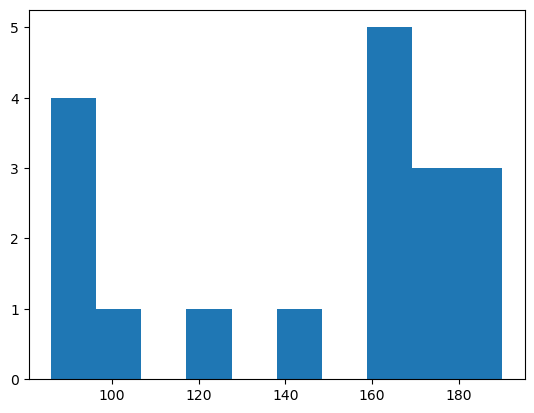

In [3381]:
plt.hist(dfr_curb['gmedian'])

(array([5., 0., 0., 1., 1., 1., 0., 3., 5., 2.]),
 array([ 85. ,  94.4, 103.8, 113.2, 122.6, 132. , 141.4, 150.8, 160.2,
        169.6, 179. ]),
 <BarContainer object of 10 artists>)

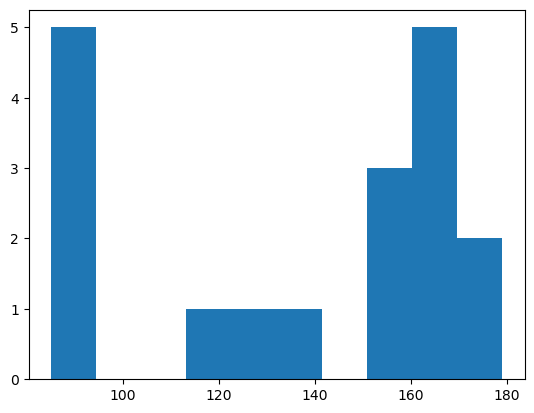

In [3382]:
plt.hist(dfr_curb['rmedian'])

(array([2., 2., 1., 1., 0., 1., 3., 4., 2., 2.]),
 array([ 82.,  94., 106., 118., 130., 142., 154., 166., 178., 190., 202.]),
 <BarContainer object of 10 artists>)

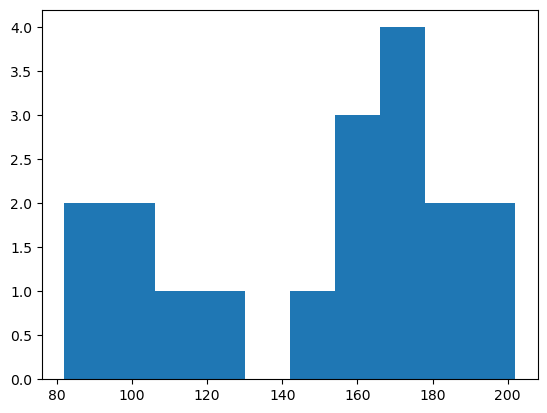

In [3383]:
plt.hist(dfr_curb['bmedian'])

(array([2., 1., 1., 1., 1., 0., 3., 3., 0., 6.]),
 array([ 83.96415328,  93.48500252, 103.00585177, 112.52670101,
        122.04755026, 131.56839951, 141.08924875, 150.610098  ,
        160.13094725, 169.65179649, 179.17264574]),
 <BarContainer object of 10 artists>)

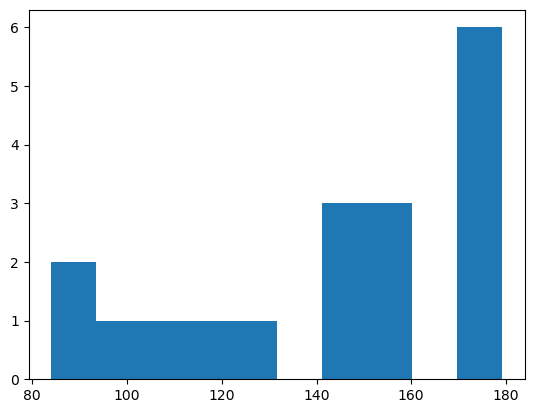

In [3384]:
plt.hist(dfr_curb['gmean'])

(array([2., 2., 1., 0., 2., 0., 1., 3., 1., 6.]),
 array([ 82.88998764,  91.38118689,  99.87238615, 108.36358541,
        116.85478466, 125.34598392, 133.83718317, 142.32838243,
        150.81958169, 159.31078094, 167.8019802 ]),
 <BarContainer object of 10 artists>)

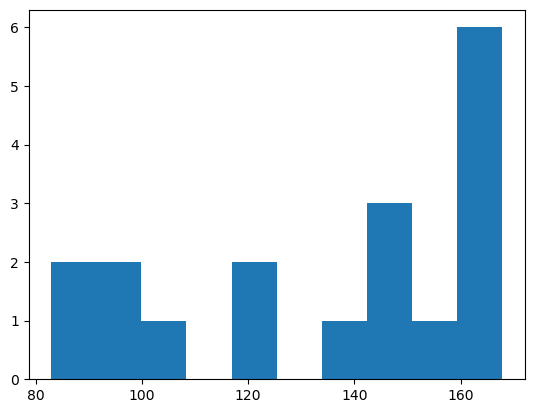

In [3385]:
plt.hist(dfr_curb['rmean'])

(array([2., 1., 1., 1., 1., 0., 4., 1., 3., 4.]),
 array([ 77.67737948,  88.52703808,  99.37669669, 110.22635529,
        121.0760139 , 131.9256725 , 142.7753311 , 153.62498971,
        164.47464831, 175.32430691, 186.17396552]),
 <BarContainer object of 10 artists>)

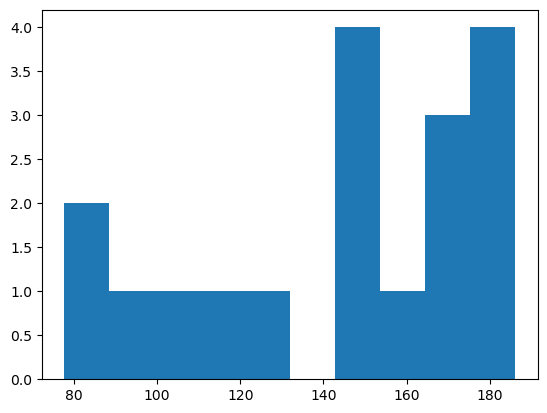

In [3386]:
plt.hist(dfr_curb['bmean'])

(array([1., 3., 1., 4., 2., 0., 2., 1., 1., 3.]),
 array([15.98236954, 18.45917662, 20.93598371, 23.4127908 , 25.88959788,
        28.36640497, 30.84321206, 33.32001914, 35.79682623, 38.27363332,
        40.7504404 ]),
 <BarContainer object of 10 artists>)

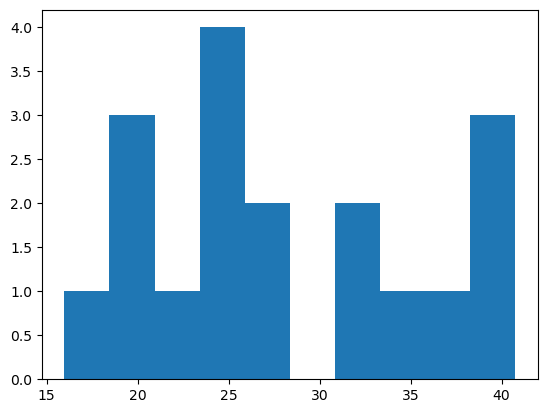

In [3387]:
plt.hist(dfr_curb['gstd'])

(array([3., 1., 1., 5., 2., 1., 0., 1., 3., 1.]),
 array([16.68038964, 19.12187829, 21.56336695, 24.0048556 , 26.44634425,
        28.88783291, 31.32932156, 33.77081021, 36.21229887, 38.65378752,
        41.09527617]),
 <BarContainer object of 10 artists>)

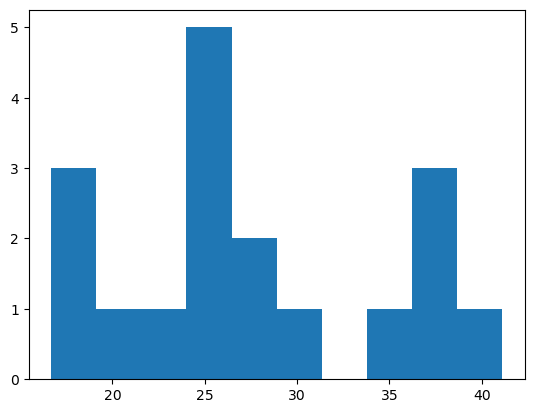

In [3388]:
plt.hist(dfr_curb['rstd'])

(array([1., 3., 1., 3., 3., 0., 2., 1., 2., 2.]),
 array([15.04748303, 17.64353486, 20.2395867 , 22.83563853, 25.43169036,
        28.02774219, 30.62379402, 33.21984585, 35.81589768, 38.41194951,
        41.00800134]),
 <BarContainer object of 10 artists>)

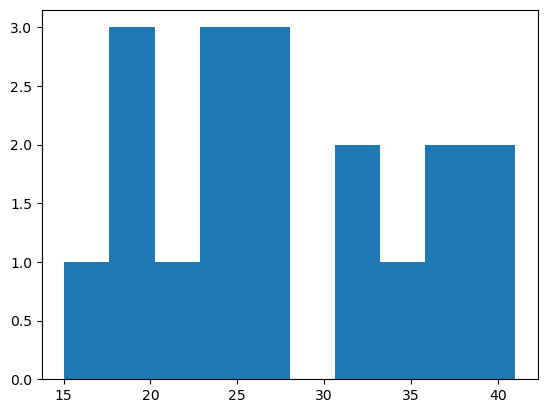

In [3389]:
plt.hist(dfr_curb['bstd'])

(array([ 0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

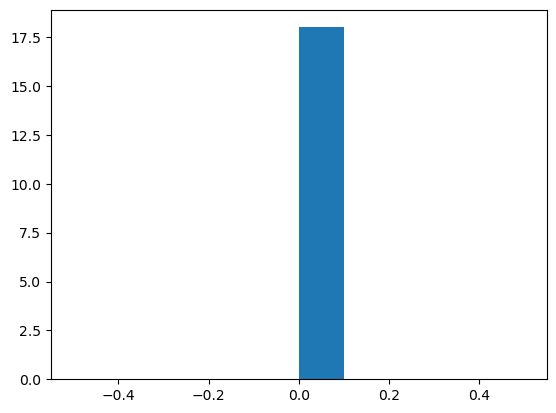

In [3390]:
plt.hist(dfr_curb['isconvex'])

(array([ 0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

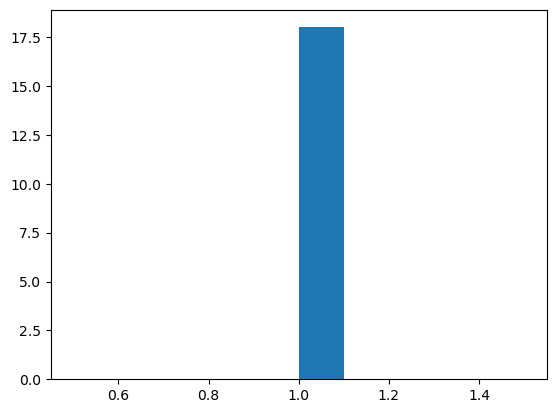

In [3391]:
plt.hist(dfr_curb['is_cen_inside'])

(array([ 0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

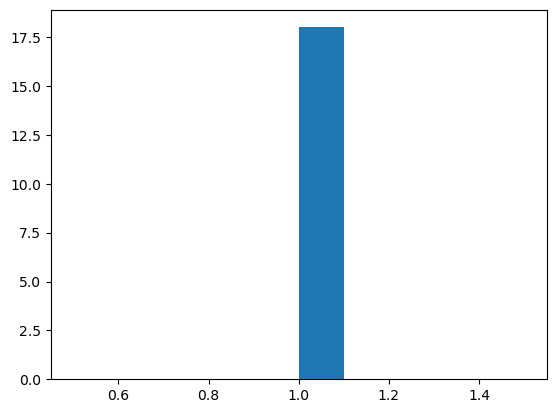

In [3392]:
plt.hist(dfr_curb['is_mce_inside'])

(array([8., 2., 1., 2., 1., 0., 2., 0., 1., 1.]),
 array([  257.  ,  1390.45,  2523.9 ,  3657.35,  4790.8 ,  5924.25,
         7057.7 ,  8191.15,  9324.6 , 10458.05, 11591.5 ]),
 <BarContainer object of 10 artists>)

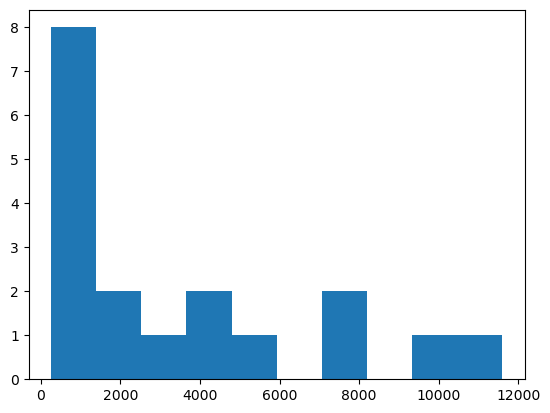

In [3393]:
plt.hist(dfr_curb['area'])

(array([12.,  4.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.80936455,  3.54092809,  6.27249164,  9.00405518, 11.73561873,
        14.46718227, 17.19874582, 19.93030936, 22.66187291, 25.39343645,
        28.125     ]),
 <BarContainer object of 10 artists>)

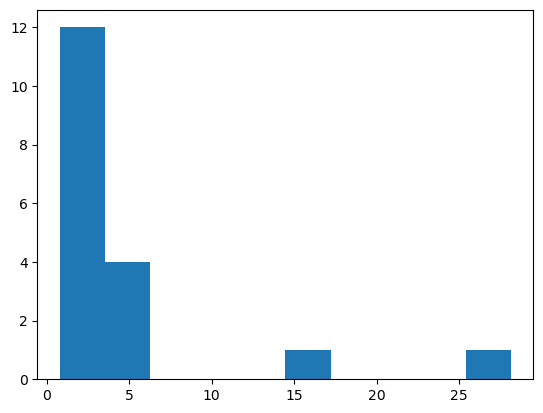

In [3394]:
plt.hist(dfr_curb['aspect_ratio_wh_s'])

(array([7., 3., 3., 0., 1., 1., 1., 1., 0., 1.]),
 array([2.72748162e-02, 4.12208220e+00, 8.21688959e+00, 1.23116970e+01,
        1.64065044e+01, 2.05013117e+01, 2.45961191e+01, 2.86909265e+01,
        3.27857339e+01, 3.68805413e+01, 4.09753487e+01]),
 <BarContainer object of 10 artists>)

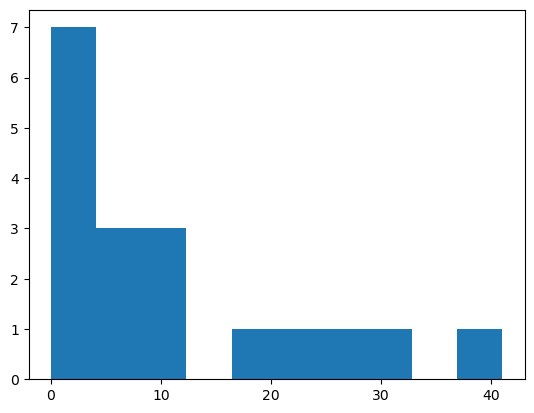

In [3395]:
plt.hist(dfr_curb['aspect_ratio_wh'])

(array([9., 2., 0., 1., 2., 0., 1., 2., 0., 1.]),
 array([0.06783063, 0.12871747, 0.18960431, 0.25049115, 0.31137799,
        0.37226483, 0.43315167, 0.49403851, 0.55492535, 0.61581219,
        0.67669903]),
 <BarContainer object of 10 artists>)

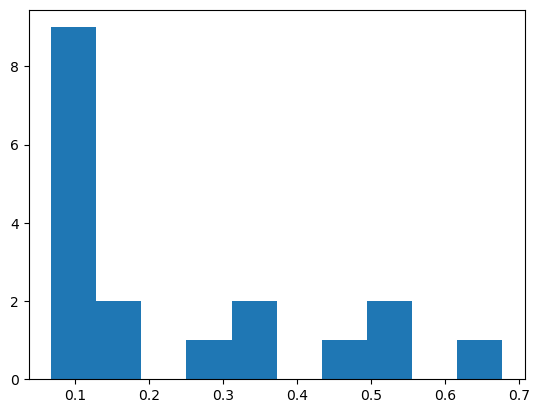

In [3396]:
plt.hist(dfr_curb['extent_s'])

(array([4., 2., 2., 2., 1., 0., 3., 1., 1., 2.]),
 array([0.50258419, 0.53480015, 0.56701611, 0.59923208, 0.63144804,
        0.66366401, 0.69587997, 0.72809594, 0.7603119 , 0.79252787,
        0.82474383]),
 <BarContainer object of 10 artists>)

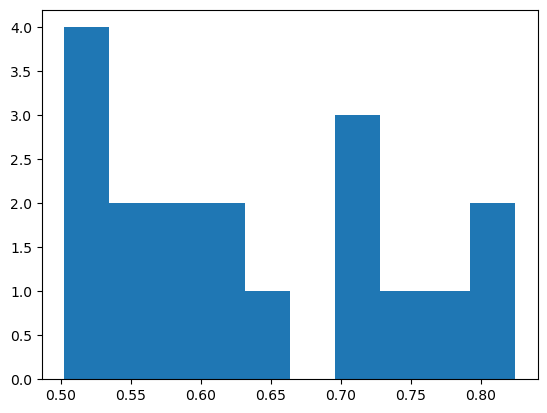

In [3397]:
plt.hist(dfr_curb['extent'])

(array([1., 2., 1., 1., 2., 1., 2., 1., 4., 3.]),
 array([0.67456073, 0.70289093, 0.73122113, 0.75955133, 0.78788153,
        0.81621173, 0.84454193, 0.87287213, 0.90120233, 0.92953253,
        0.95786273]),
 <BarContainer object of 10 artists>)

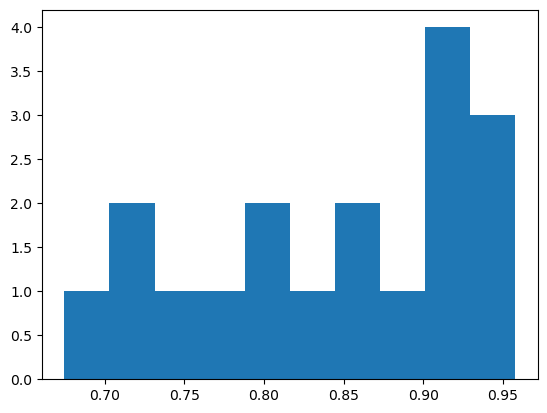

In [3398]:
plt.hist(dfr_curb['solidity'])

(array([5., 2., 2., 1., 1., 2., 1., 2., 1., 1.]),
 array([ 18.08929415,  28.42892687,  38.76855958,  49.1081923 ,
         59.44782501,  69.78745773,  80.12709044,  90.46672316,
        100.80635587, 111.14598859, 121.4856213 ]),
 <BarContainer object of 10 artists>)

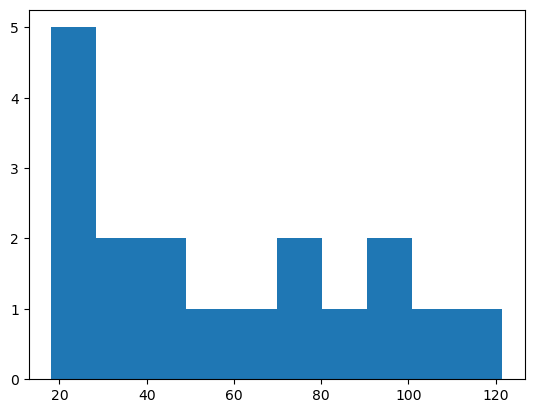

In [3399]:
plt.hist(dfr_curb['ed'])

(array([9., 5., 1., 1., 0., 0., 0., 1., 0., 1.]),
 array([  8.37894241,  23.27550148,  38.17206056,  53.06861964,
         67.96517871,  82.86173779,  97.75829687, 112.65485594,
        127.55141502, 142.4479741 , 157.34453318]),
 <BarContainer object of 10 artists>)

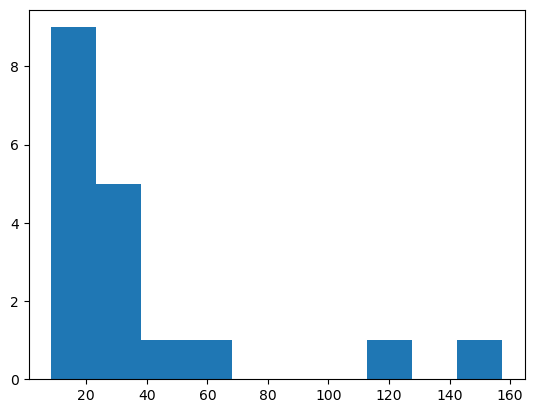

In [3400]:
plt.hist(dfr_curb['ratio_ell'])

(array([3., 4., 2., 2., 1., 0., 2., 1., 2., 1.]),
 array([ 115.6812396 ,  218.26012807,  320.83901653,  423.417905  ,
         525.99679346,  628.57568192,  731.15457039,  833.73345885,
         936.31234732, 1038.89123578, 1141.47012424]),
 <BarContainer object of 10 artists>)

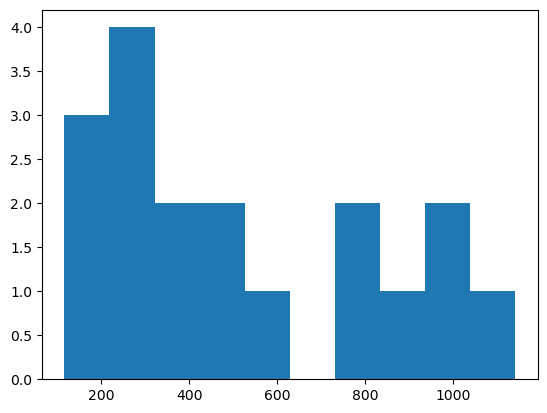

In [3401]:
plt.hist(dfr_curb['perimeter'])